In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization ,experimental
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow import keras
from keras.models import Model

In [2]:
pwd

'C:\\Users\\Admin'

In [3]:
trainpath = 'C:\\Users\\Admin\\Desktop\\fruitclassification\\Train'
testpath = 'C:\\Users\\Admin\\Desktop\\fruitclassification\\Test'

### Reading Train Images

In [4]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.png'))
  print("Number of images in the folder is",len(files))
  for j in files:
      class_fruit={'banana':0,'gala':1, 'grannysmith':2, 'lime':3, 'pinklady':4}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_fruit[i])

Entering to the folder name: banana
Number of images in the folder is 20
Entering to the folder name: gala
Number of images in the folder is 21
Entering to the folder name: grannysmith
Number of images in the folder is 20
Entering to the folder name: lime
Number of images in the folder is 20
Entering to the folder name: pinklady
Number of images in the folder is 20


### Reading Test Images

In [5]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.png'))
  print("Number of images in the folder is",len(files))
  for j in files:
      class_fruit={'banana':0,'gala':1, 'grannysmith':2, 'lime':3, 'pinklady':4}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_fruit[i])

Entering to the folder name: banana
Number of images in the folder is 10
Entering to the folder name: gala
Number of images in the folder is 10
Entering to the folder name: grannysmith
Number of images in the folder is 10
Entering to the folder name: lime
Number of images in the folder is 10
Entering to the folder name: pinklady
Number of images in the folder is 10


### Visualizing Train Images

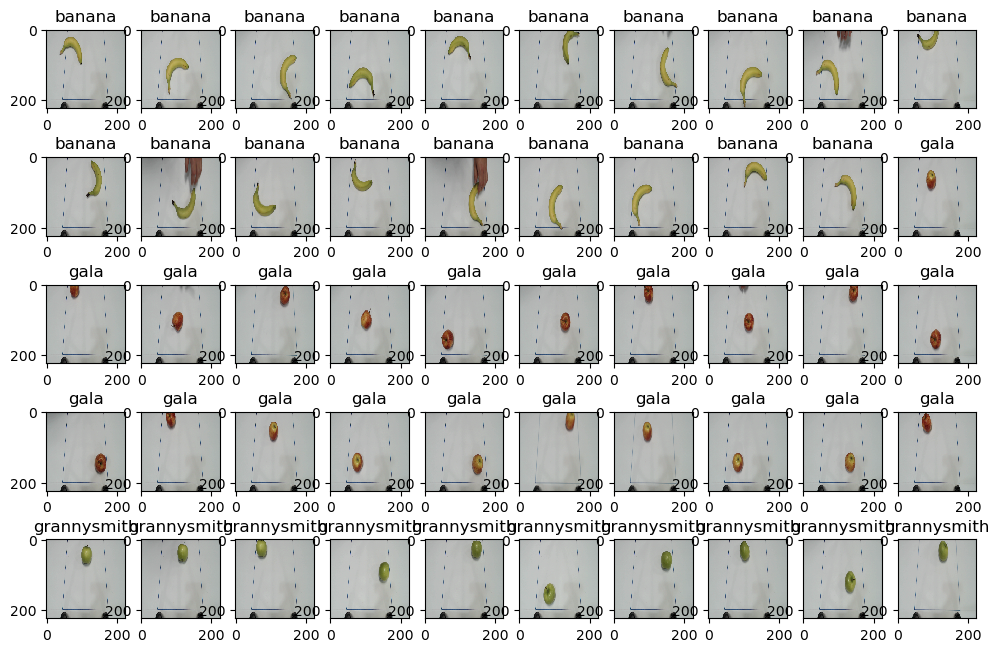

In [6]:
w=100
h=200
fig=plt.figure(figsize=(12, 8))
columns = 10
rows = 5

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('banana')
    elif train_labels[i] == 1:
        ax.title.set_text('gala')
    elif train_labels[i] == 2:
        ax.title.set_text('grannysmith')
    elif train_labels[i] == 3:
        ax.title.set_text('lime')
    elif train_labels[i] == 4:
        ax.title.set_text('pinklady')
        
    
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

### Visualizing Test Images

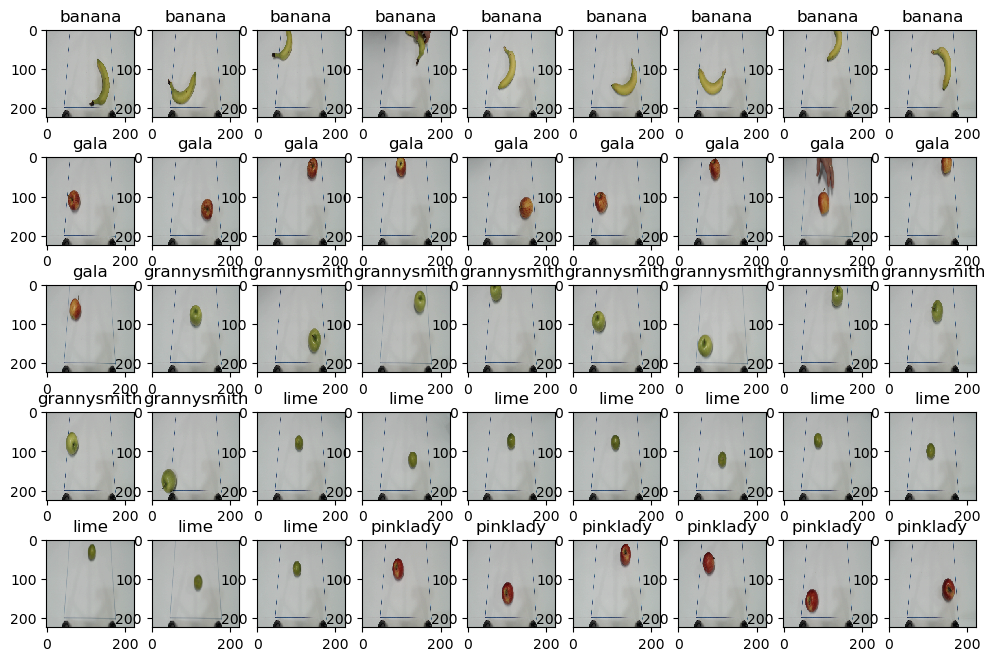

In [7]:
w=100
h=200
fig=plt.figure(figsize=(12, 8))
columns = 9
rows = 5

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('banana')
    elif test_labels[i] == 1:
        ax.title.set_text('gala')
    elif test_labels[i] == 2:
        ax.title.set_text('grannysmith')
    elif test_labels[i] == 3:
        ax.title.set_text('lime')
    elif test_labels[i] == 4:
        ax.title.set_text('pinklady')
        
    
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [8]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)

### Size of Test & Train Dataset

In [9]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(101, 224, 224, 3)
********************
(101,)
********************
(50, 224, 224, 3)
(50,)


In [10]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)
y_train1=y_train
y_test1=y_test
y_train,y_test=keras_to_categorical(y_train,y_test)

In [11]:
y_train1.shape,y_test1.shape

((101,), (50,))

### RAW VGG16

In [12]:
def model_vgg16():
    VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
   
    for layer in VGG_model.layers:
        layer.trainable = False 
    feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
    d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
    d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
    d3=Dense(units=5,kernel_initializer="glorot_uniform", activation='softmax')(d2)  
    output = Model(inputs =VGG_model.input, outputs =d3)
#output = Model(inputs =VGG_model.input, outputs =feature)
  
    return output

model16=model_vgg16()

In [13]:
model16.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [14]:
history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
21/21 [==============================] - 17s 805ms/step - loss: 0.1547 - accuracy: 0.3564 - val_loss: 0.1424 - val_accuracy: 0.3600
Epoch 2/10
21/21 [==============================] - 18s 890ms/step - loss: 0.1269 - accuracy: 0.5347 - val_loss: 0.1224 - val_accuracy: 0.6000
Epoch 3/10
21/21 [==============================] - 19s 907ms/step - loss: 0.1100 - accuracy: 0.6139 - val_loss: 0.1101 - val_accuracy: 0.5800
Epoch 4/10
21/21 [==============================] - 19s 913ms/step - loss: 0.0978 - accuracy: 0.7129 - val_loss: 0.0990 - val_accuracy: 0.6600
Epoch 5/10
21/21 [==============================] - 19s 922ms/step - loss: 0.0818 - accuracy: 0.8119 - val_loss: 0.0870 - val_accuracy: 0.8000
Epoch 6/10
21/21 [==============================] - 19s 933ms/step - loss: 0.0749 - accuracy: 0.7921 - val_loss: 0.0814 - val_accuracy: 0.7400
Epoch 7/10
21/21 [==============================] - 19s 939ms/step - loss: 0.0618 - accuracy: 0.8218 - val_loss: 0.0843 - val_accuracy: 0.7600

In [15]:
test_accuracies = []
 
for i in range(3):
    model16=model_vgg16()
    model16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
    history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test))
   
    test_loss, test_accuracy = model16.evaluate(X_test, y_test)
    test_accuracies.append(test_accuracy)

Epoch 1/10
21/21 [==============================] - 21s 982ms/step - loss: 0.1611 - accuracy: 0.2574 - val_loss: 0.1490 - val_accuracy: 0.4800
Epoch 2/10
21/21 [==============================] - 20s 974ms/step - loss: 0.1370 - accuracy: 0.6634 - val_loss: 0.1227 - val_accuracy: 0.6800
Epoch 3/10
21/21 [==============================] - 20s 971ms/step - loss: 0.1150 - accuracy: 0.6436 - val_loss: 0.1116 - val_accuracy: 0.7400
Epoch 4/10
21/21 [==============================] - 21s 1s/step - loss: 0.1022 - accuracy: 0.6634 - val_loss: 0.1033 - val_accuracy: 0.6800
Epoch 5/10
21/21 [==============================] - 21s 1s/step - loss: 0.0901 - accuracy: 0.6832 - val_loss: 0.0905 - val_accuracy: 0.6600
Epoch 6/10
21/21 [==============================] - 22s 1s/step - loss: 0.0738 - accuracy: 0.8020 - val_loss: 0.0966 - val_accuracy: 0.6600
Epoch 7/10
21/21 [==============================] - 22s 1s/step - loss: 0.0613 - accuracy: 0.8515 - val_loss: 0.0903 - val_accuracy: 0.6200
Epoch 8/10


### Feature Extraction of VGG-16

In [16]:
def model_vgg16():
    VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))

    for layer in VGG_model.layers:
        layer.trainable = False 
    feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
#output = Model(inputs =VGG_model.input, outputs =d2)
    output = Model(inputs =VGG_model.input, outputs =feature)
  
    return output

model_FE_16=model_vgg16()

In [17]:
model_FE_16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

2/2 [==============================] - 7s 2s/step


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400, random_state=42)
rf=rf.fit(train_feature_16,y_train)
train_pred=rf.predict(train_feature_16)
test_pred=rf.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.6
